In [41]:
from gammapy.irf import EffectiveAreaTable2D
from gammapy.irf import EnergyDispersion2D
from gammapy.data import DataStore
from gammapy.image import SkyImage
from gammapy.background import ReflectedRegionsBackgroundEstimator, RingBackgroundEstimator
from gammapy.spectrum import SpectrumExtraction
from astropy.coordinates import SkyCoord, Angle
from gammapy.scripts import StackedObsImageMaker
from gammapy.utils.energy import Energy

import matplotlib.pyplot as plt
from gammapy.spectrum.models import LogParabola, PowerLaw
import astropy.units as u
from gammapy.spectrum import SpectrumFit
from gammapy.image import SkyImage, IACTBasicImageEstimator
import pandas as pd
from regions import CircleSkyRegion
%matplotlib inline

In [42]:
aeff = EffectiveAreaTable2D.read('../data/fact/fact_irf.fits')

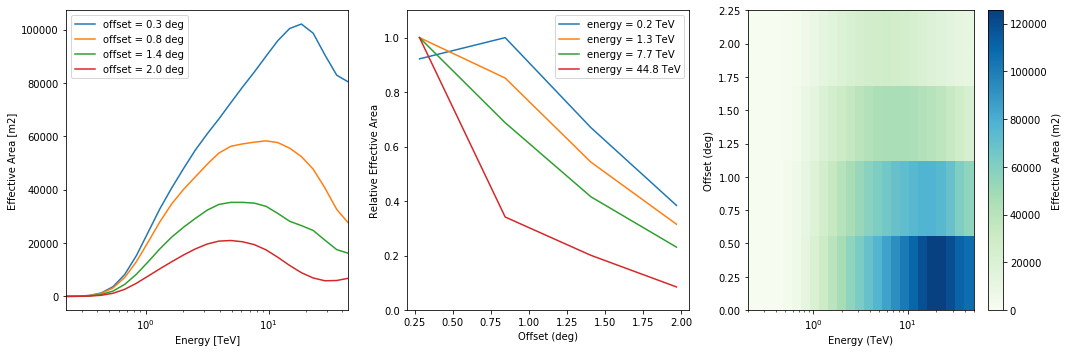

In [43]:
aeff.peek()

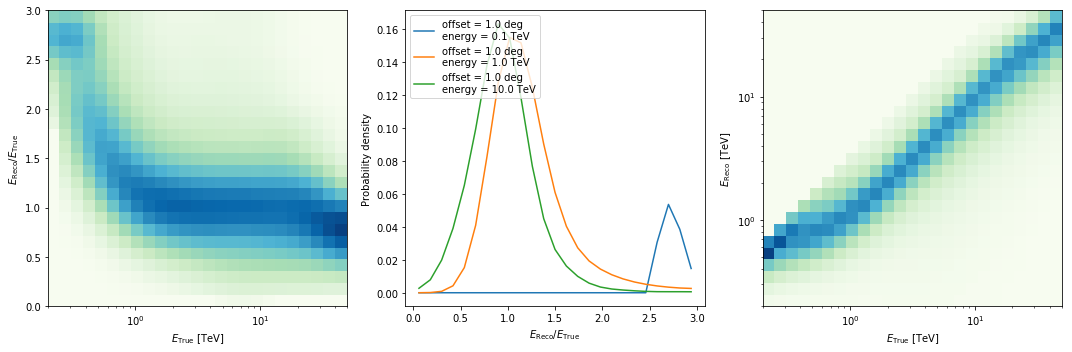

In [44]:
edisp =  EnergyDispersion2D.read('../data/fact/fact_irf.fits', hdu='ENERGY DISPERSION')
edisp.peek()

In [45]:
d = edisp.to_energy_dispersion(offset=0*u.deg)
e_reco_bins = d.e_reco.bins
e_true_bins = d.e_true.bins
e_true_bins

<Quantity [ 0.2       ,  0.24942937,  0.31107506,  0.38795629,  0.48383847,
            0.60341763,  0.75255041,  0.93854089,  1.17049833,  1.45978333,
            1.8205642 ,  2.27051094,  2.83166061,  3.53149666,  4.404295  ,
            5.49280272,  6.8503317 ,  8.54336973, 10.6548368 , 13.28814634,
           16.57227009, 20.66805473, 25.77609972, 32.14658204, 40.0915091 ,
           50.        ] TeV>

In [46]:
df = pd.read_csv('./../data/fact/observations.csv')
obs_ids = df.OBS_ID.values
datastore = DataStore.from_dir('./../data/fact/')
datastore.info()
datastore.obs_table['LIVETIME'].unit = None



Data store summary info:
name: noname

HDU index table:
BASE_DIR: ../data/fact
Rows: 654
OBS_ID: 20131101151 -- 20131106238
HDU_TYPE: ['aeff', 'edisp', 'events']
HDU_CLASS: ['aeff_2d', 'edisp_2d', 'events']

Observation table:
Number of observations: 218


In [47]:
aeff.meta['RAD_MAX']

0.1732050807568877

In [48]:
EXCLUSION_FILE = '$GAMMAPY_EXTRA/datasets/exclusion_masks/tevcat_exclusion.fits'

# fetch the cooordinate of the object we are wobbling around from the fits file
RA_OBJ = 83.63
DEC_OBJ = 22.01

target_position = SkyCoord(ra=RA_OBJ, dec=DEC_OBJ, unit='deg', frame='icrs') # coordinates of the Crab 
on_region_radius = Angle(aeff.meta['RAD_MAX'] * u.deg) 
on_region = CircleSkyRegion(center=target_position, radius=on_region_radius)

allsky_mask = SkyImage.read(EXCLUSION_FILE)

exclusion_mask = allsky_mask.cutout(
    position=on_region.center,
    size=Angle('5 deg'),
)



In [49]:
obs_list = datastore.obs_list(obs_ids) 

In [50]:
background_estimator = ReflectedRegionsBackgroundEstimator(
    obs_list=obs_list,
    on_region=on_region,
    exclusion_mask=exclusion_mask # this does not work without an exclusion mask. looks like a bug to me.
)

background_estimator.run()

In [126]:
# import numpy as np

# energy_bins = np.logspace(np.log10(0.8), np.log10(35), 15) * u.TeV
energy_bins = e_true_bins
extraction = SpectrumExtraction(obs_list=obs_list,
                                bkg_estimate=background_estimator.result,
                                containment_correction=False,
                                e_reco = energy_bins,
                                e_true = energy_bins
                               )
extraction.run()


No thresholds defined for obs Info for OBS_ID = 20131101151
- Start time: 56598.08
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 2.100 %

No thresholds defined for obs Info for OBS_ID = 20131101152
- Start time: 56598.09
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.760 %

No thresholds defined for obs Info for OBS_ID = 20131101153
- Start time: 56598.09
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.790 %

No thresholds defined for obs Info for OBS_ID = 20131101154
- Start time: 56598.09
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.860 %

No thresholds defined for obs Info for OBS_ID = 20131101157
- Start time: 56598.10
- Pointing pos: RA 84.13 deg / Dec 22.40 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.820 %

No thresholds defined for obs Info for OBS_ID

No thresholds defined for obs Info for OBS_ID = 20131102205
- Start time: 56599.17
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.230 %

No thresholds defined for obs Info for OBS_ID = 20131103093
- Start time: 56600.07
- Pointing pos: RA 84.13 deg / Dec 22.40 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.690 %

No thresholds defined for obs Info for OBS_ID = 20131103103
- Start time: 56600.08
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.670 %

No thresholds defined for obs Info for OBS_ID = 20131103104
- Start time: 56600.09
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.680 %

No thresholds defined for obs Info for OBS_ID = 20131103105
- Start time: 56600.09
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.710 %

No thresholds defined for obs Info for OBS_ID

No thresholds defined for obs Info for OBS_ID = 20131104162
- Start time: 56601.07
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.920 %

No thresholds defined for obs Info for OBS_ID = 20131104163
- Start time: 56601.07
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.900 %

No thresholds defined for obs Info for OBS_ID = 20131104164
- Start time: 56601.08
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.920 %

No thresholds defined for obs Info for OBS_ID = 20131104165
- Start time: 56601.08
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.950 %

No thresholds defined for obs Info for OBS_ID = 20131104168
- Start time: 56601.09
- Pointing pos: RA 84.13 deg / Dec 22.40 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.920 %

No thresholds defined for obs Info for OBS_ID

No thresholds defined for obs Info for OBS_ID = 20131104246
- Start time: 56601.24
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 2.010 %

No thresholds defined for obs Info for OBS_ID = 20131105152
- Start time: 56602.06
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.690 %

No thresholds defined for obs Info for OBS_ID = 20131105155
- Start time: 56602.07
- Pointing pos: RA 84.13 deg / Dec 22.40 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.920 %

No thresholds defined for obs Info for OBS_ID = 20131105156
- Start time: 56602.07
- Pointing pos: RA 84.13 deg / Dec 22.40 deg
- Observation duration: 300.0 s
- Dead-time fraction: 2.000 %

No thresholds defined for obs Info for OBS_ID = 20131105157
- Start time: 56602.08
- Pointing pos: RA 84.13 deg / Dec 22.40 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.990 %

No thresholds defined for obs Info for OBS_ID

No thresholds defined for obs Info for OBS_ID = 20131105239
- Start time: 56602.24
- Pointing pos: RA 84.13 deg / Dec 22.40 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.980 %

No thresholds defined for obs Info for OBS_ID = 20131105240
- Start time: 56602.24
- Pointing pos: RA 84.13 deg / Dec 22.40 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.960 %

No thresholds defined for obs Info for OBS_ID = 20131106154
- Start time: 56603.06
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.900 %

No thresholds defined for obs Info for OBS_ID = 20131106155
- Start time: 56603.07
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.960 %

No thresholds defined for obs Info for OBS_ID = 20131106156
- Start time: 56603.07
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 2.040 %

No thresholds defined for obs Info for OBS_ID

No thresholds defined for obs Info for OBS_ID = 20131106236
- Start time: 56603.23
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.780 %

No thresholds defined for obs Info for OBS_ID = 20131106237
- Start time: 56603.23
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.860 %

No thresholds defined for obs Info for OBS_ID = 20131106238
- Start time: 56603.24
- Pointing pos: RA 83.14 deg / Dec 21.63 deg
- Observation duration: 300.0 s
- Dead-time fraction: 1.840 %



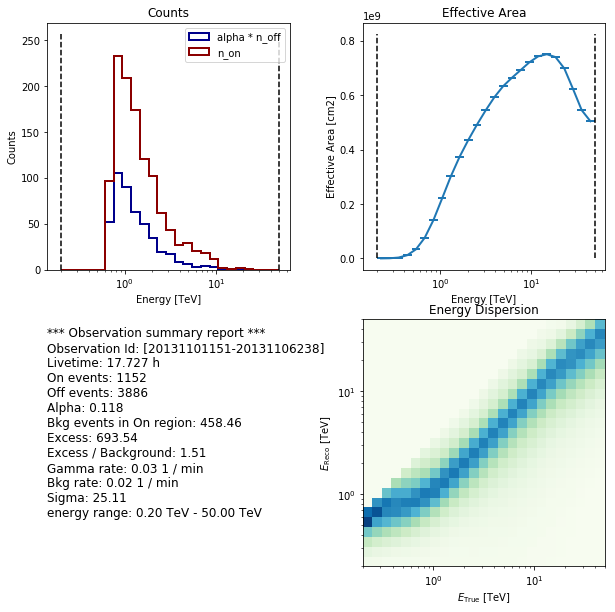

In [127]:
# gammapy diagnostic plots
spectrum_observation = extraction.observations.stack()
spectrum_observation.peek()

/usr/local/lib/python3.6/site-packages/gammapy/stats/fit_statistics.py:166: RuntimeWarning: divide by zero encountered in log
  term3_ = - n_off * np.log(mu_bkg)
/usr/local/lib/python3.6/site-packages/gammapy/stats/fit_statistics.py:203: RuntimeWarning: divide by zero encountered in log
  term1 = - n_on * (1 - np.log(n_on))
/usr/local/lib/python3.6/site-packages/gammapy/stats/fit_statistics.py:204: RuntimeWarning: divide by zero encountered in log
  term2 = - n_off * (1 - np.log(n_off))
/usr/local/lib/python3.6/site-packages/gammapy/stats/fit_statistics.py:161: RuntimeWarning: divide by zero encountered in log
  term2_ = - n_on * np.log(mu_sig + alpha * mu_bkg)


(<matplotlib.axes._subplots.AxesSubplot at 0x127254630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12727dd30>)

<Figure size 720x720 with 0 Axes>

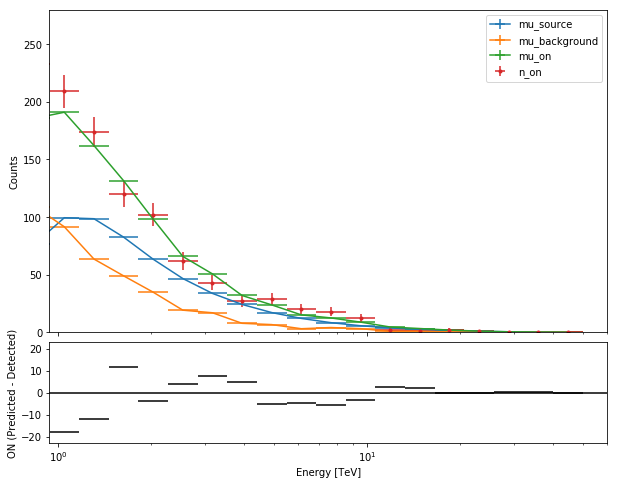

In [143]:

model = LogParabola(amplitude = 3*1e-11 * u.Unit('cm-2 s-1 TeV-1'),
                    reference = 1 * u.Unit('TeV'),
                    alpha = 2 * u.Unit(''),
                    beta = 1 * u.Unit(''))

# model.parameters['beta'].parmin = 0
# model.parameters['beta'].parmax = 12

# model.parameters['alpha'].parmin = 0.0
# model.parameters['alpha'].parmax = 10

# model = PowerLaw(amplitude = 2.80*1e-11 * u.Unit('cm-2 s-1 TeV-1'), index=2.62, reference= 1 * u.TeV)
# model.parameters['amplitude'].parmin = 1.80*1e-11 
# model.parameters['amplitude'].parmax = 4.40*1e-11 
# model.parameters['index'].parmin = 2.2
# model.parameters['index'].parmax = 3.0

fit_range=(1*u.TeV, 50*u.TeV)
fit = SpectrumFit(obs_list=spectrum_observation, model=model, fit_range=fit_range)

fit.fit()
fit.est_errors()
fit_result = fit.result[0]
plt.figure(figsize=(10, 10))
fit_result.plot(figsize=(10, 10))

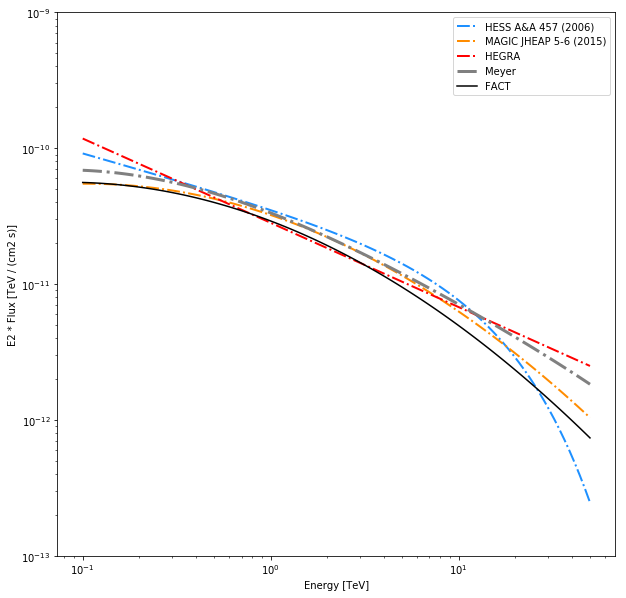

In [144]:
from gammapy.spectrum import CrabSpectrum
crab_hess_ecpl = CrabSpectrum('hess_ecpl')
crab_magic_lp = CrabSpectrum('magic_lp')
crab_hegra = CrabSpectrum('hegra')
crab_meyer = CrabSpectrum('meyer')
plt.figure(figsize=(10, 10))
# plot HESS and MAGIC reference spectrum
r = [0.1, 50] * u.TeV
crab_hess_ecpl.model.plot(r,flux_unit='TeV-1 cm-2 s-1', ls ='-.', lw=2, color='dodgerblue', label = 'HESS A&A 457 (2006)', energy_power=2)

crab_magic_lp.model.plot(r, flux_unit='TeV-1 cm-2 s-1', ls ='-.', lw=2, color='darkorange', label = 'MAGIC JHEAP 5-6 (2015)', energy_power=2)

crab_hegra.model.plot(r, flux_unit='TeV-1 cm-2 s-1', ls ='-.', lw=2, color='red', label = 'HEGRA', energy_power=2)

crab_meyer.model.plot(r, flux_unit='TeV-1 cm-2 s-1', ls ='-.', lw=3, color='gray', label = 'Meyer', energy_power=2,)


fit_result.model.plot(energy_range=r, color='black', energy_power=2, label='FACT')
plt.ylim([1E-13, 10E-10])
plt.legend()

In [145]:
fit_result.model.parameters.to_dict()


{'covariance': [[1.457800172271662e-23,
   0.0,
   9.160123045700719e-13,
   -2.9296509406685244e-13],
  [0.0, 0.0, 0.0, 0.0],
  [9.160123045700719e-13, 0.0, 0.0890482362162417, -0.03414631429623676],
  [-2.9296509406685264e-13, 0.0, -0.03414631429623677, 0.014976076076706377]],
 'parameters': [{'frozen': False,
   'max': nan,
   'min': nan,
   'name': 'amplitude',
   'unit': '1 / (cm2 s TeV)',
   'value': 2.918504397459351e-11},
  {'frozen': True,
   'max': nan,
   'min': nan,
   'name': 'reference',
   'unit': 'TeV',
   'value': 1.0},
  {'frozen': False,
   'max': nan,
   'min': nan,
   'name': 'alpha',
   'unit': '',
   'value': 2.526496491345675},
  {'frozen': False,
   'max': nan,
   'min': nan,
   'name': 'beta',
   'unit': '',
   'value': 0.10556948544292787}]}